In [2]:
import os


In [256]:
# Go overa type of model

base_dir = '/data/yijun/NTT/model-results-1006/'

model_type = 'TGConvNGATCluster2'
graph_type = 'naive'
exp_type = 'h32_SVM_rs4321'
networks = ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', 
            '1NTT30990', '1NTT48337', '1NTT19213', '1NTT22885', '1NTT18635']

def parse_res(s):
    res = s.strip().split(':')[2:]
    return [float(r[:5]) for r in res]

def parser(f):
    cur_network, res = '', []
    for line in f:
        if 'data_path' in line:    
            cur_network = line.split('/')[-1].split('_')[0]
            res = []
        if 'Test' in line:
            res.append(parse_res(line))
        if 'Models have been saved' in line:
            res = res[-1:]
        if 'RuntimeError' in line:
            res = ['error', 'error', 'error', 'error', 'error']
    return cur_network, res
        
network_res = {i: [0,0,0,0,0] for i in networks}
for subdir, dirs, files in os.walk(base_dir):
    
    for file in files:
        
        if model_type == file.split('_')[0] \
            and file.split('_')[1] != 'UN' \
            and graph_type in file \
            and exp_type in file \
            and '.log' in file:
            
            f = open(os.path.join(subdir, file), 'r')
            network, out = parser(f)

            if len(out) == 0:
                network_res[network] = [0,0,0,0,0]
            else:
                network_res[network] = out[0]
                
for k,v in network_res.items():
    print(f'{k},{v[0]},{v[1]},{v[2]},{v[3]},{v[4]}')
            


1NTT18927,0,0,0,0,0
1NTT19535,0,0,0,0,0
1NTT67246,0,0,0,0,0
1NTT19478,0,0,0,0,0
143XB8CT,0,0,0,0,0
1NTT30990,0,0,0,0,0
1NTT48337,0,0,0,0,0
1NTT19213,0,0,0,0,0
1NTT22885,0,0,0,0,0
1NTT18635,0,0,0,0,0


In [177]:
# Go overa type of model

base_dir = '/data/yijun/NTT/model-results-1006/'

model_type = 'TGConvNGATCC'
graph_type = 'naive'
exp_type = 'h32_SVM_rs4321'
networks = ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', 
            '1NTT30990', '1NTT48337', '1NTT19213', '1NTT22885', '1NTT18635']

def parse_res(s):
    res = s.strip().split(':')[2:]
    return [float(r[:5]) for r in res]

def parser(f):
    cur_network, res = '', []
    for line in f:
        if 'data_path' in line:    
            cur_network = line.split('/')[-1].split('_')[0]
        if 'weighted labels' in line:
            res = line.split(':')[-1][2:-2].split(' ')
            res = [float(i) for i in res]
    return cur_network, res
        
network_res = {i: [0,0] for i in networks}
for subdir, dirs, files in os.walk(base_dir):
    
    for file in files:
        
        if model_type in file \
            and file.split('_')[1] == 'UN' \
            and graph_type in file \
            and exp_type in file \
            and '.log' in file:
            
            f = open(os.path.join(subdir, file), 'r')
            network, out = parser(f)
            
            network_res[network] = out
            print(out)
            


[0.03755801, 0.96244199]
[0.10842215, 0.89157785]
[0.08801211, 0.91198789]
[0.11924519, 0.88075481]
[0.02494693, 0.97505307]
[0.02130998, 0.97869002]
[0.04785362, 0.95214638]
[0.03703869, 0.96296131]
[0.05330926, 0.94669074]
[0.27098774, 0.72901226]


In [115]:
import numpy as np

networks = ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', 
            '1NTT30990', '1NTT48337', '1NTT19213', '1NTT22885', '1NTT18635']

for i, network in enumerate(networks): # networks[1:2]):

    base_dir = '/data/yijun/NTT/'
    data_name = f'{network}_naive_itv_72'
    data_path = os.path.join(base_dir, f'graph-data/08/{data_name}/graph.npz')
        
    data = np.load(data_path, allow_pickle=True)
    num_nodes = len(data['node_name'])
    graph_label = data['graph_label']
    num_event = sum(1 for i in range(graph_label.shape[0]) if graph_label[i] == 1)
    
    num_unlabel = sum(1 for i in range(graph_label.shape[0]) if graph_label[i] == -1)
    num_label = sum(1 for i in range(graph_label.shape[0])) - num_unlabel    
      
    out_str = [network, num_nodes, num_event, str(network_res[network][1]) + ':'+ str(network_res[network][0])]
    out_str = [str(i) for i in out_str]
    
    print(' & '.join(out_str) +  ' \\\ \hline', num_label / num_unlabel )

1NTT18927 & 53 & 125 & 0.96:0.04 \\ \hline 0.5457227138643068
1NTT19535 & 84 & 142 & 0.89:0.11 \\ \hline 0.16157635467980297
1NTT67246 & 36 & 134 & 0.91:0.09 \\ \hline 0.19211324570273003
1NTT19478 & 120 & 147 & 0.88:0.12 \\ \hline 0.15080527086383602
143XB8CT & 97 & 78 & 0.98:0.02 \\ \hline 0.48441926345609065
1NTT30990 & 20 & 71 & 0.98:0.02 \\ \hline 0.5356561380657766
1NTT48337 & 89 & 83 & 0.95:0.05 \\ \hline 0.22160341924621163
1NTT19213 & 119 & 78 & 0.96:0.04 \\ \hline 0.2822185970636215
1NTT22885 & 91 & 91 & 0.95:0.05 \\ \hline 0.21876211396821293
1NTT18635 & 143 & 189 & 0.73:0.27 \\ \hline 0.08004122294744075


In [294]:
networks = ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', 
            '1NTT30990', '1NTT48337', '1NTT19213', '1NTT22885', '1NTT18635']

m = ['SVC', 'GAT', 'GAT-LSTM', 'MTAD-GAT', 'Deep SAD',
     'GatedConv-NGAT + only CC Loss', 
     'GatedConv-NGAT + only KL Loss', 
     'corr',
     'Our Method']

precision = {
    m[0]: [0.386, 0.524, 0.364, 0.366, 0.116, 0.049, 0.141, 0.19, 0.269, 0.481], # fixed
    m[1]: [0.458, 0.535, 0.531, 0.319, 0.149, 0.156, 0.5, 0.158, 0.357, 0.739], # fixed
    m[2]: [0.438, 0.455, 0.214, 0.327, 0.141, 0.231, 0.135, 0.114, 0.483, 0.676],
    m[3]: [0.327, 0.477, 0.190, 0.316, 0.155, 0.206, 0.178, 0.101, 0.405, 0.623],
    m[4]: [0.647, 0.75, 0.742, 0.667, 0.198, 0.219, 0.636, 0.174, 0.507, 0.693],  # fixed
    m[5]: [0.864, 0.913, 0.946, 0.846, 0.667, 0.267, 0.682, 0.333, 0.875, 0.947],  # fixed
    m[6]: [0.735, 0.876, 0.923, 0.897, 0.621, 0.254, 0.629, 0.303, 0.810, 0.950], # fixed
    m[7]: [0.714, 0.775, 0.850, 0.927, 0.495, 0.184, 0.470, 0.355, 0.553, 0.617],
    m[8]: [0.898, 0.893, 0.963, 0.955, 0.674, 0.294, 0.691, 0.450, 0.850, 0.978], # fixed
}

recall = {
    m[0]: [0.880, 0.759, 0.857, 0.867, 0.647, 0.467, 0.722, 0.235, 0.947, 0.949], # fixed
    m[1]: [0.880, 0.793, 0.607, 0.733, 0.765, 0.467, 0.611, 0.706, 0.789, 0.795], # fixed
    m[2]: [0.840, 0.517, 0.750, 0.533, 0.235, 0.200, 0.389, 0.529, 0.737, 0.641],
    m[3]: [0.666, 0.632, 0.655, 0.577, 0.313, 0.466, 0.259, 0.490, 0.579, 0.735],
    m[4]: [0.880, 0.724, 0.821, 0.667, 0.765, 0.467, 0.389, 0.235, 0.632, 0.897],  # fixed
    m[5]: [0.760, 0.724, 0.964, 0.733, 0.353, 0.267, 0.833, 0.576, 0.737, 0.923],  # fixed
    m[6]: [0.700, 0.692, 0.857, 0.693, 0.373, 0.333, 0.722, 0.647, 0.895, 0.974], # fixed
    m[7]: [0.746, 0.701, 0.769, 0.577, 0.366, 0.477, 0.614, 0.592, 0.791, 0.860],
    m[8]: [0.760, 0.862, 0.929, 0.700, 0.400, 0.611, 0.829, 0.789, 0.949, 0.982], # fixed
}

def _f1(i, j): 
    return round(2 * (precision[i][j] * recall[i][j]) / (precision[i][j] + recall[i][j]), 3) 

f1 = {
    m[0]: [_f1(m[0], i) for i in range(len(networks))], 
    m[1]: [_f1(m[1], i) for i in range(len(networks))], 
    m[2]: [_f1(m[2], i) for i in range(len(networks))], 
    m[3]: [_f1(m[3], i) for i in range(len(networks))], 
    m[4]: [_f1(m[4], i) for i in range(len(networks))], 
    m[5]: [_f1(m[5], i) for i in range(len(networks))], 
    m[6]: [_f1(m[6], i) for i in range(len(networks))], 
    m[7]: [_f1(m[7], i) for i in range(len(networks))], 
    m[8]: [_f1(m[8], i) for i in range(len(networks))], 
}
                                 
# f1 = {
#     m[0]: [0.537, 0.620, 0.511, 0.515, 0.196, 0.089, 0.236, 0.211, 0.419, 0.638], # fixed
#     m[1]: [0.603, 0.639, 0.567, 0.444, 0.250, 0.233, 0.550, 0.258, 0.492, 0.861], # fixed
#     m[2]: [0.504, 0.546, 0.508, 0.536, 0.131, 0.262, 0.255, 0.112, 0.403, 0.665],
#     m[3]: [0.431, 0.593, 0.295, 0.449, 0.094, 0.266, 0.117, 0.168, 0.375, 0.523],
#     m[4]: [0.746, 0.737, 0.78, 0.667, 0.173, 0.298, 0.483, 0.113, 0.312, 0.715],  # fixed
#     m[5]: [0.809, 0.808, 0.982, 0.786, 0.462, 0.267, 0.757, 0.231, 0.8, 0.935],  # fixed
#     m[6]: [0.202, 0, 0.889, 0.966, 0, 0.4, 0.813, 0.177, 0.85, 0.962], # fixed
#     m[5]: [0.864, 0.877, 0.945, 0.808, 0.487, 0.279, 0.811, 0.486, 0.769, 0.974], # fixed
# }

for k, v in f1.items():
    print(k, v)


SVC [0.537, 0.62, 0.511, 0.515, 0.197, 0.089, 0.236, 0.21, 0.419, 0.638]
GAT [0.602, 0.639, 0.566, 0.445, 0.249, 0.234, 0.55, 0.258, 0.492, 0.766]
GAT-LSTM [0.576, 0.484, 0.333, 0.405, 0.176, 0.214, 0.2, 0.188, 0.584, 0.658]
MTAD-GAT [0.439, 0.544, 0.295, 0.408, 0.207, 0.286, 0.211, 0.167, 0.477, 0.674]
Deep SAD [0.746, 0.737, 0.78, 0.667, 0.315, 0.298, 0.483, 0.2, 0.563, 0.782]
GatedConv-NGAT + only CC Loss [0.809, 0.808, 0.955, 0.785, 0.462, 0.267, 0.75, 0.422, 0.8, 0.935]
GatedConv-NGAT + only KL Loss [0.717, 0.773, 0.889, 0.782, 0.466, 0.288, 0.672, 0.413, 0.85, 0.962]
corr [0.73, 0.736, 0.807, 0.711, 0.421, 0.266, 0.532, 0.444, 0.651, 0.719]
Our Method [0.823, 0.877, 0.946, 0.808, 0.502, 0.397, 0.754, 0.573, 0.897, 0.98]


In [285]:
s = []
for i in range(len(networks)):
    s.append((f1['Our Method'][i] - f1['ST-Conv-NGAT + only KL Loss'][i]) / f1['ST-Conv-NGAT + only KL Loss'][i])
    print(networks[i], (f1['Our Method'][i] - f1['ST-Conv-NGAT + only CC Loss'][i]) / f1['ST-Conv-NGAT + only CC Loss'][i])
    
print(sum(s) / len(s))

KeyError: 'ST-Conv-NGAT + only KL Loss'

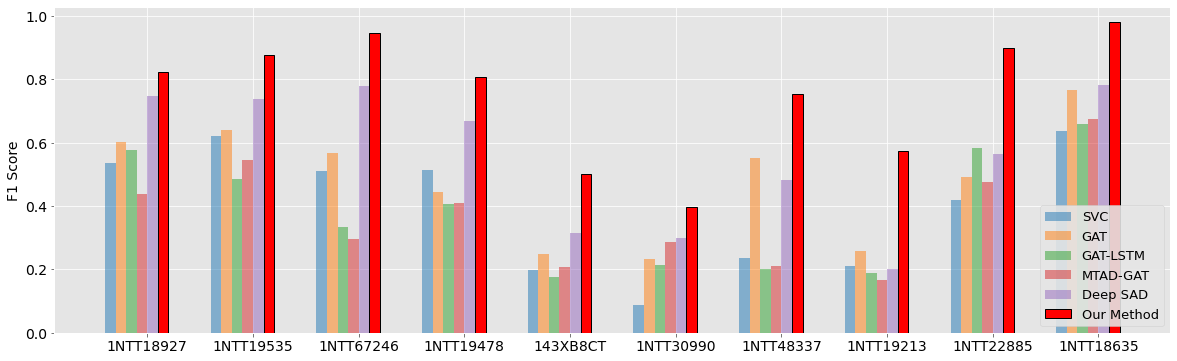

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.style.use('ggplot')


N = len(networks)
fig = plt.figure(figsize=(20, 6))
colors = sns.color_palette("tab10", 10)
    
ind = np.arange(N)
width = 0.1     

for i in [0,1,2,3,4]: #range(len(m) - 1):
    
    plt.bar(ind + i * width, f1[m[i]], width, label=m[i], 
            color=colors[i], alpha = 0.5)

plt.bar(ind + (len(m) - 1 - 2) * width, f1[m[-1]], width, label=m[-1], 
        color='r', edgecolor='black', lw=1)
    
plt.ylabel('F1 Score', fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.xticks(ind + (len(m) - 1) * width / 2, networks, fontsize=14, color='black')
plt.legend(loc=4, fontsize=13, framealpha=0.9)
plt.show()


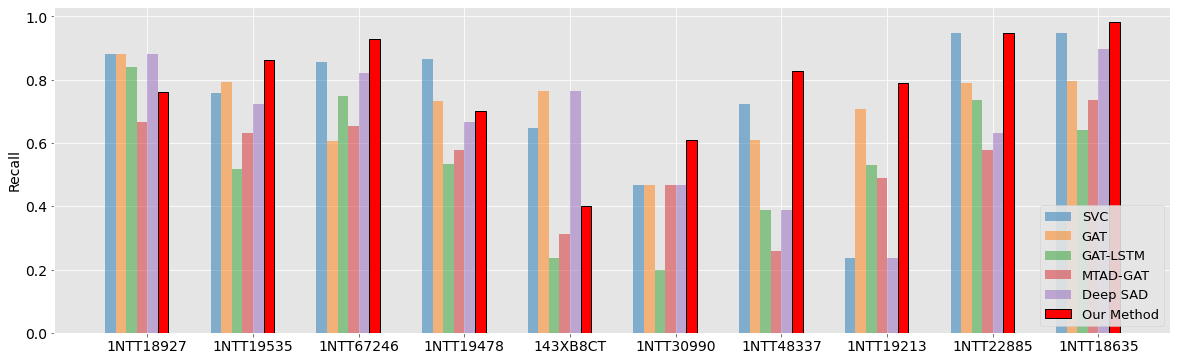

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.style.use('ggplot')


N = len(networks)
fig = plt.figure(figsize=(20, 6))
colors = sns.color_palette("tab10", 10)
    
ind = np.arange(N)
width = 0.1     

for i in [0,1,2,3,4]: #range(len(m) - 1):
    
    plt.bar(ind + i * width, recall[m[i]], width, label=m[i], 
            color=colors[i], alpha = 0.5)

plt.bar(ind + (len(m) - 1 - 2) * width, recall[m[-1]], width, label=m[-1], 
        color='r', edgecolor='black', lw=1)
    
plt.ylabel('Recall', fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.xticks(ind + (len(m) - 1) * width / 2, networks, fontsize=14, color='black')
plt.legend(loc=4, fontsize=13, framealpha=0.9)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

networks = ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', 
            '1NTT30990', '1NTT48337', '1NTT19213', '1NTT22885', '1NTT18635']

m = ['SVM', 'GAT', 'GAT-LSTM', 'MTAD-GAT', 'Deep SAD',
#      'ST-Conv-NGAT + only CC Loss', 
#      'ST-Conv-NGAT + only KL Loss', 
     'Our Method']

N = len(networks)
fig = plt.figure(figsize=(20, 6))
colors = sns.color_palette("tab10", 10)
    
ind = np.arange(N)
width = 0.1     

for i in range(len(m) - 1):
    
    plt.bar(ind + i * width, res[m[i]], width, label=m[i], 
            color=colors[i], alpha = 0.6)

plt.bar(ind + (len(m) - 1) * width, res[m[-1]], width, label=m[-1], 
        color='r', edgecolor='black', lw=1)
    
plt.ylabel('Recall', fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.xticks(ind + (len(m) - 1) * width / 2, networks, fontsize=14, color='black')
plt.legend(loc=4, fontsize=13, framealpha=0.9)
plt.show()


In [196]:
import os
import logging
import pickle
import datetime

import sys 
sys.path.append("..") 

import numpy as np
import torch

from semi_supervised_AD.data_utils.ntt_dataset import NTTDataset
from semi_supervised_AD.data_utils.data_container import DataContainer
from semi_supervised_AD.utils.train_options import arg_parse, verbose, initialize_tb
from semi_supervised_AD.models.others import svm_classify, svm_predict
from semi_supervised_AD.utils.evaluate import evaluate

        
''' loading data '''
for i, network in enumerate(networks): # networks[1:2]):

    base_dir = '/data/yijun/NTT/'
    data_name = f'{network}_naive_itv_72'
    data_path = os.path.join(base_dir, f'graph-data/08/{data_name}')
    dataset = NTTDataset(root=data_path)
    data = DataContainer(dataset, 
                         num_classes=2,
                         batch_size=32,
                         use_unlabel=False,
                         shuffle=True,
                         random_seed=1234)
   
    train_x, train_y, test_x, test_y = [], [], [], []
    weight = data.label_weight.numpy()
    
    for d in data.train_dataset:
        train_x.append(d.x.numpy().reshape(1, -1))
        train_y.append(d.y.numpy().reshape(1, -1))
    
    for d in data.test_dataset:
        test_x.append(d.x.numpy().reshape(1, -1))
        test_y.append(d.y.numpy().reshape(1, -1))
     
    train_x = np.concatenate(train_x)
    train_y = np.concatenate(train_y)
    test_x = np.concatenate(test_x)
    test_y = np.concatenate(test_y)
    
    clf = svm_classify(train_x, train_y, label_weight=weight)
    test_p = svm_predict(test_x, clf).reshape(1, -1)

    loss = evaluate(test_y.reshape(-1, 1), test_p.reshape(-1, 1))
    print('{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}.'.format(*loss))
        

num_train: 1997, num_val: 666, num_test: 666.
weighted labels: [0.03755801 0.96244199]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.995, 0.945, 0.386, 0.880, 0.537.
num_train: 786, num_val: 262, num_test: 263.
weighted labels: [0.10814627 0.89185373]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.968, 0.915, 0.524, 0.759, 0.620.
num_train: 909, num_val: 303, num_test: 306.
weighted labels: [0.08801211 0.91198789]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.983, 0.849, 0.364, 0.857, 0.511.
num_train: 740, num_val: 246, num_test: 249.
weighted labels: [0.11892291 0.88107709]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.978, 0.795, 0.366, 0.867, 0.515.
num_train: 1844, num_val: 615, num_test: 617.
weighted labels: [0.02494693 0.97505307]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.989, 0.860, 0.116, 0.647, 0.196.
num_train: 1971, num_val: 657, num_test: 660.
weighted labels: [0.02130998 0.97869002]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.985, 0.791, 0.049, 0.467, 0.089.
num_train: 1023, num_val: 341, num_test: 345.
weighted labels: [0.0479004 0.9520996]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.980, 0.758, 0.141, 0.722, 0.236.
num_train: 1242, num_val: 414, num_test: 418.
weighted labels: [0.03703869 0.96296131]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.967, 0.958, 0.190, 0.235, 0.211.
num_train: 1012, num_val: 338, num_test: 340.
weighted labels: [0.05336194 0.94663806]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.996, 0.847, 0.269, 0.947, 0.419.
num_train: 418, num_val: 139, num_test: 141.
weighted labels: [0.27033946 0.72966054]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.969, 0.608, 0.481, 0.949, 0.638.
